In [1]:
from pprint import pprint
from pymongo import MongoClient

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!brew services restart mongodb-community@6.0

Stopping `mongodb-community`... (might take a while)
==> Successfully stopped `mongodb-community` (label: homebrew.mxcl.mongodb-commu
==> Successfully started `mongodb-community` (label: homebrew.mxcl.mongodb-commu


In [3]:
client = MongoClient()

In [4]:
client.list_database_names()

['Books24_DB',
 'Cars_DB',
 'Grustnogram_DB',
 'HH_vacancies_db',
 'admin',
 'config',
 'local']

In [5]:
grustnogram = client.Grustnogram_DB

In [6]:
grustnogram.list_collection_names()

['ananishnev']

In [7]:
ananishnev = grustnogram['ananishnev']

In [8]:
n_followers = len(list(ananishnev.find()))
n_followers

40

In [9]:
df = pd.DataFrame(ananishnev.find())
df = df.drop('_id', axis=1)
df.head()

,id,nickname,name,avatar,tag
0,168935,seesaworsiso,Sandra,https://560621.selcdn.ru/gg/168935_1655283717_...,Follower
1,168934,depralison,alison in depression,https://560621.selcdn.ru/gg/168934_1655283526_...,Follower
2,168933,marie.usti,Мария Усти,https://560621.selcdn.ru/gg/168933_1655283498_...,Follower
3,161418,v_11.11,,https://560621.selcdn.ru/gg/empty_profile.jpg,Follower
4,159101,qop,Общедоступный аккаунт,https://560621.selcdn.ru/gg/159101_1662394165_...,Follower


In [10]:
follows = df.loc[df['tag'] == 'is Followed']

In [11]:
followers = df.loc[df['tag'] == 'Follower']

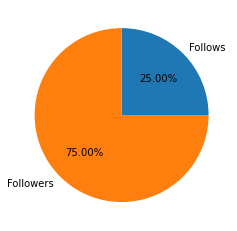

In [12]:
sizes = [len(follows['id']), len(followers['id'])]
labels = ['Follows', 'Followers']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.show()